[[ -2.3980386   -7.6987314  -32.89226    ...   8.2188835   13.020526
   16.601637  ]
 [  0.72655857   5.54812      8.866779   ...  15.775656    17.175133
    4.1660366 ]
 [ 14.287069    14.787265    13.200121   ...  12.5336      17.213043
   17.55361   ]
 ...
 [-32.89226    -32.89226    -32.89226    ... -32.89226    -32.89226
  -32.89226   ]
 [-32.89226    -32.89226    -32.89226    ... -32.89226    -32.89226
  -32.89226   ]
 [-32.89226    -32.89226    -32.89226    ... -32.89226    -32.89226
  -32.89226   ]]


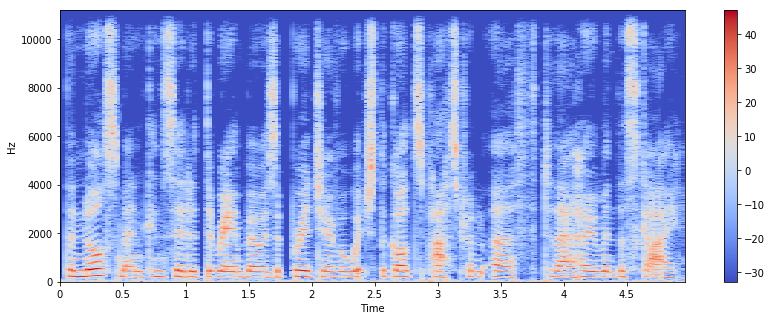

In [5]:
import librosa, os
sr=22400
files = ['p240_00000.wav','p240_00073.wav', 'p260_00002.wav']
fname = os.path.join(r'C:\Users\Ramstein\Downloads', files[0])   # Hi-hat
wav, _ = librosa.core.load(fname, sr=sr)

# wav = wav[:len(wav)//5]
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
#     plt.figure(figsize=(14, 5))
#     librosa.display.waveplot(wav, sr=sr)


#display Spectrogram
X = librosa.stft(wav)
Xdb = librosa.amplitude_to_db(abs(X))
print(Xdb)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


# import librosa as l
# from scipy.io import wavfile
# from pydub import AudioSegment

# sound = AudioSegment.from_file(fname)

# halfway_point = len(sound) // 2
# first_half = sound[:halfway_point]

In [6]:
# fname = os.path.join(r'C:\Users\Ramstein\Downloads', files[1])   # Hi-hat
# wav, _ = librosa.core.load(fname, sr=sr)
# # print(wav)
# print(len(wav)//33.333333)

# import math
# ix=1
# for i  in range(int(len(wav)//33.333333)):
#     n_wav = wav[33*i : 33*(i+1)]
# #     print(n_wav)
# #     print(ix, len(n_wav))
#     ix+=1
    
#     x = librosa.stft(wav)
#     xdb = librosa.amplitude_to_db(abs(x))
#     # for i in xdb:
#     #     print(i)
# #     print(len(xdb))

#     plt.figure(figsize=(20, 5))
#     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz') 
#     plt.colorbar()
# # wav = wav[99*1:99*2]
# # print(wav)
# # print(len(wav))


(20, 217)


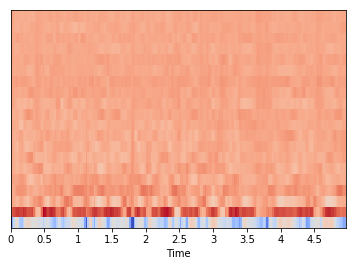

In [7]:
fname = os.path.join(r'C:\Users\Ramstein\Downloads', files[0])   # Hi-hat
wav, _ = librosa.core.load(fname, sr=sr)

## Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(wav, sr=sr)

print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

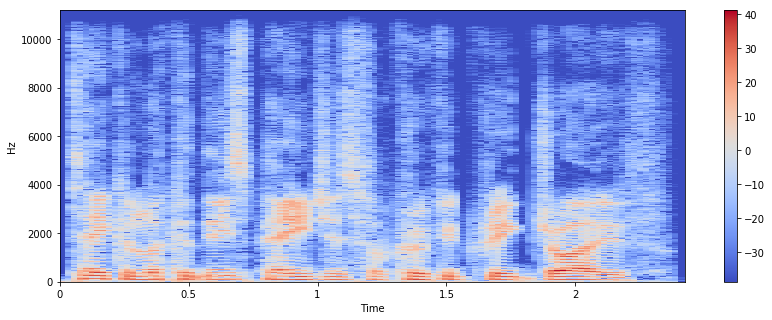

In [5]:
fname = os.path.join(r'C:\Users\Ramstein\Downloads', files[2])   # Hi-hat
wav, _ = librosa.core.load(fname, sr=sr)

#Short-time Fourier transform (STFT)
X = librosa.stft(wav)

#Convert an amplitude spectrogram to dB-scaled spectrogram.
Xdb = librosa.amplitude_to_db(abs(X)) 

# plotting the wavform
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

99
1025


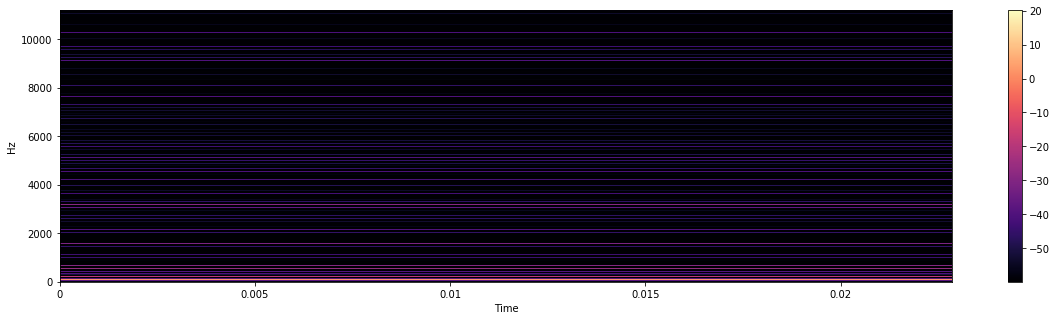

In [2]:
fname = os.path.join(r'C:\Users\Ramstein\Downloads', files[1])   # Hi-hat
wav, _ = librosa.core.load(fname, sr=sr)
wav = wav[99*3:99*4]
print(len(wav))

x = librosa.stft(wav)
xdb = librosa.amplitude_to_db(abs(x))
# for i in xdb:
#     print(i)
print(len(xdb))
plt.figure(figsize=(20, 5))
librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

99
1025


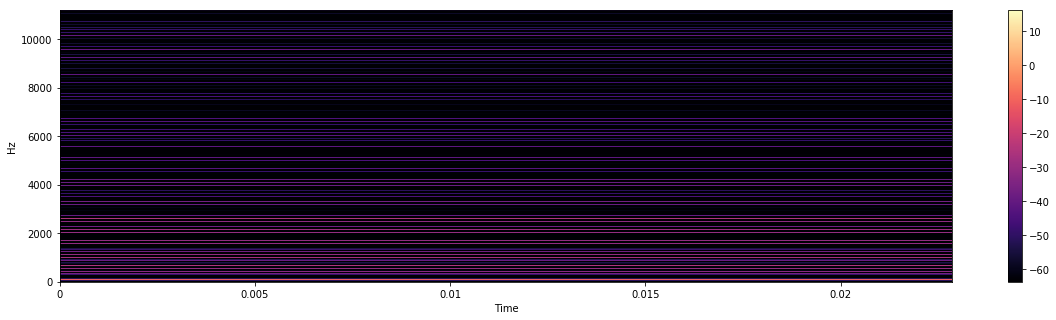

In [3]:
fname = os.path.join(r'C:\Users\Ramstein\Downloads', files[1])   # Hi-hat
wav, _ = librosa.core.load(fname, sr=sr)
wav = wav[99*2:99*3]
print(len(wav))

x = librosa.stft(wav)
xdb = librosa.amplitude_to_db(abs(x))
# for i in xdb:
#     print(i)
print(len(xdb))
plt.figure(figsize=(20, 5))
librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

In [4]:
import tqdm as tqdm
import pandas as pd
import numpy as np
import os
import librosa

def data_to_spec(data):
    
    #Short-time Fourier transform (STFT)
    d = librosa.stft(data)
    
    # Convert a power spectrogram (amplitude squared) to decibel (dB) units
    return librosa.power_to_db(np.abs(d)**2, ref=np.median)

def file_to_spec(filename):
    data, sr = librosa.load(filename)
    return data_to_spec(data)

def wav_to_stft(files, labels):
    data_arr, info=[], []
    for file in files:
        d = file_to_spec(file)
        # d = drop_frequency_bands(d)
        if d is not 0:
            data_arr.append(d)
    return data_arr